# Steps to solve Emergency vs Non-Emergency vehicle classification problem

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [2]:
!unzip //content/NN/NN/Dataset.zip

Archive:  //content/NN/NN/Dataset.zip
replace Dataset/emergency_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [4]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [5]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [6]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

,count
emergency_or_not,
0,1361
1,991


In [7]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [8]:
# shape of the image
X.shape

(2352, 224, 224, 3)

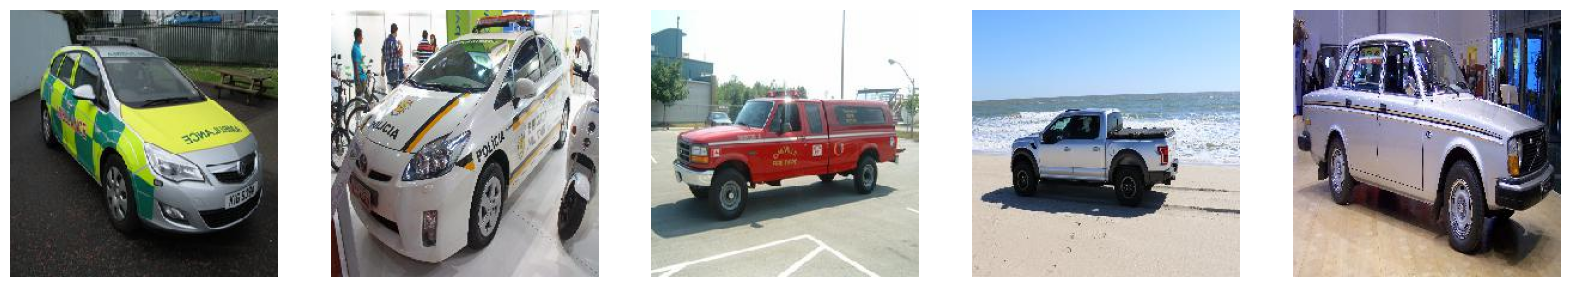

In [9]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

## 2. Pre-processing the data

![alt text](https://drive.google.com/uc?id=1qrMvsKOgTmo4Zt93r8G84Z5I_2IfVduq)

In [10]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [11]:
# minimum and maximum pixel values of images
X.min(), X.max()

(np.uint8(0), np.uint8(255))

In [12]:
# normalizing the pixel values
X = X / X.max()

In [13]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(np.float64(0.0), np.float64(1.0))

## 3. Creating training and validation set

In [14]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [15]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [16]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [17]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compiling the model

In [18]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the model

In [19]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - accuracy: 0.5267 - loss: 1.0268 - val_accuracy: 0.6416 - val_loss: 0.6404
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6553 - loss: 0.6303 - val_accuracy: 0.6643 - val_loss: 0.6242
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6345 - loss: 0.6387 - val_accuracy: 0.6657 - val_loss: 0.6139
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6952 - loss: 0.5944 - val_accuracy: 0.6402 - val_loss: 0.6309
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.6492 - loss: 0.6315 - val_accuracy: 0.6671 - val_loss: 0.5984
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6840 - loss: 0.5944 - val_accuracy: 0.6105 - val_loss: 0.6645
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6633 - loss: 0.6133 - val_accuracy: 0.6870 - val_loss: 0.5820
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.6747 - loss: 0.5907 - val_accuracy: 0.6728 

## 7. Evaluating model performance

In [20]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [22]:
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)

In [23]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7294617563739377 %


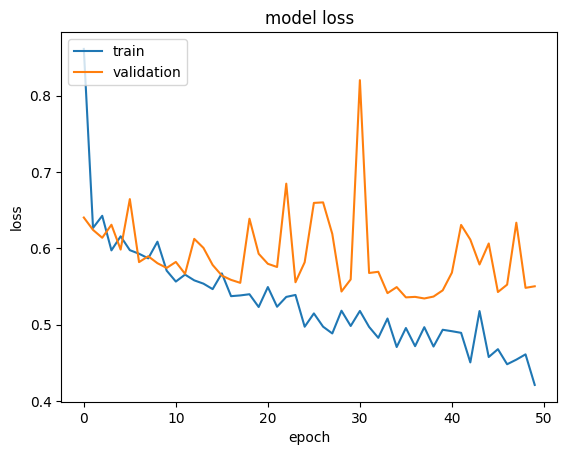

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

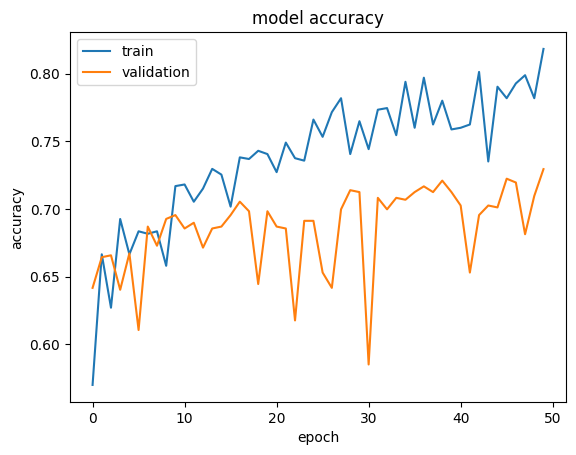

In [25]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 43 % sure that it is emergency
And actual class is  0


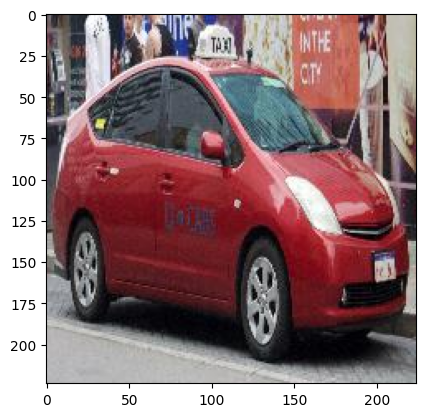

In [26]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (predictions * 100).astype(int)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

### 1. Changing activation function of hidden layer

In [27]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [28]:
# summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.5244 - loss: 1.7586 - val_accuracy: 0.5609 - val_loss: 0.6681
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6056 - loss: 0.6629 - val_accuracy: 0.5652 - val_loss: 0.6616
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5992 - loss: 0.6480 - val_accuracy: 0.6402 - val_loss: 0.6626
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6660 - loss: 0.6411 - val_accuracy: 0.6388 - val_loss: 0.6342
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6425 - loss: 0.6356 - val_accuracy: 0.6416 - val_loss: 0.6286
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6711 - loss: 0.6042 - val_accuracy: 0.5652 - val_loss: 0.7589
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6855 - loss: 0.6054 - val_accuracy: 0.5453 - val_loss: 0.7487
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6329 - loss: 0.6488 - val_accuracy: 0.6728 - 

In [31]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [32]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,prediction_int), '%')

Accuracy on validation set: 0.7351274787535411 %


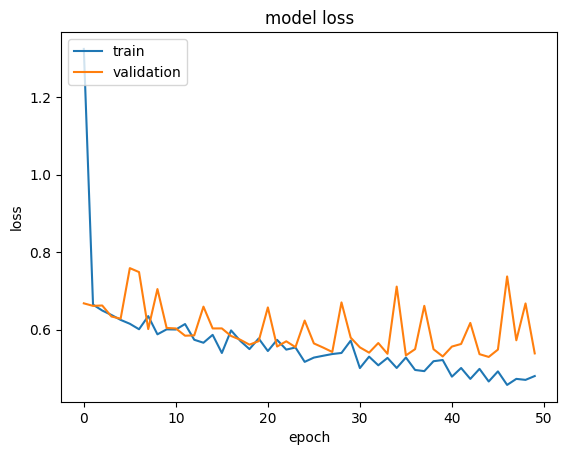

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 2. Increasing hidden neurons

In [34]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [35]:
# model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │   154,141,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,142,721 (588.01 MB)

 Trainable params: 154,142,721 (588.01 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 406ms/step - accuracy: 0.5084 - loss: 1.8320 - val_accuracy: 0.5609 - val_loss: 0.9274
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5610 - loss: 0.7663 - val_accuracy: 0.5722 - val_loss: 0.6781
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6307 - loss: 0.6494 - val_accuracy: 0.6544 - val_loss: 0.6191
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.6343 - loss: 0.6499 - val_accuracy: 0.6572 - val_loss: 0.6165
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6889 - loss: 0.5935 - val_accuracy: 0.6261 - val_loss: 0.6330
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6799 - loss: 0.6038 - val_accuracy: 0.6487 - val_loss: 0.6134
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5936 - loss: 0.6680 - val_accuracy: 0.6926 - val_loss: 0.5869
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6866 - loss: 0.5975 - val_accuracy: 0.6445 

In [37]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [38]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7195467422096318 %


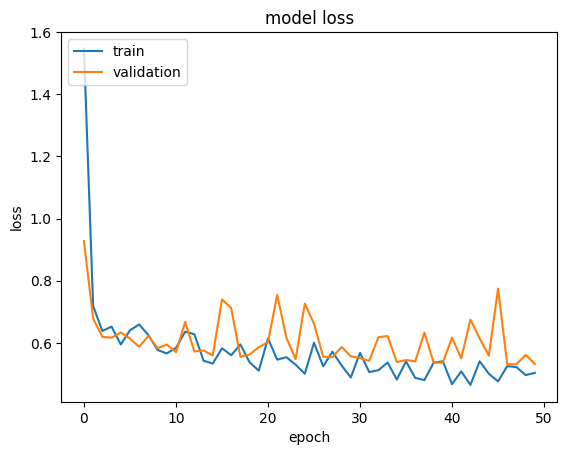

In [39]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 3. Increasing hidden layers

In [40]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [41]:
# model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.5081 - loss: 0.7061 - val_accuracy: 0.5595 - val_loss: 0.6800
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.5700 - loss: 0.6749 - val_accuracy: 0.5595 - val_loss: 0.6726
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6175 - loss: 0.6518 - val_accuracy: 0.6119 - val_loss: 0.6591
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6229 - loss: 0.6556 - val_accuracy: 0.6544 - val_loss: 0.6507
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6353 - loss: 0.6471 - val_accuracy: 0.6558 - val_loss: 0.6449
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6466 - loss: 0.6482 - val_accuracy: 0.6388 - val_loss: 0.6424
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6784 - loss: 0.6272 - val_accuracy: 0.6700 - val_loss: 0.6347
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6693 - loss: 0.6314 - val_accuracy: 0.6558 - 

In [43]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,prediction_int), '%')

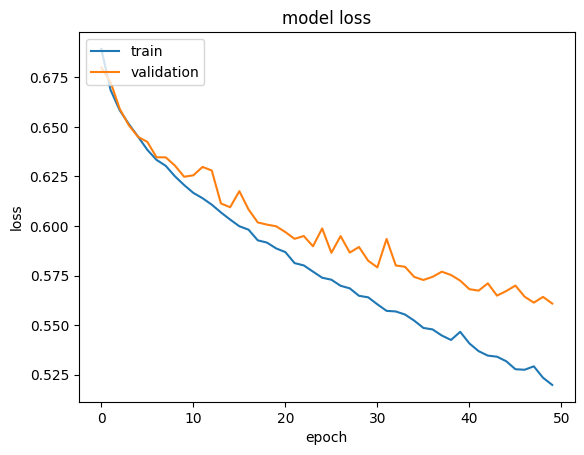

In [44]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 4. Increasing number of epochs

In [45]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [46]:
# model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - accuracy: 0.5215 - loss: 1.0780 - val_accuracy: 0.5949 - val_loss: 0.6519
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6260 - loss: 0.6449 - val_accuracy: 0.6544 - val_loss: 0.6289
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6532 - loss: 0.6377 - val_accuracy: 0.6416 - val_loss: 0.6305
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6381 - loss: 0.6267 - val_accuracy: 0.6431 - val_loss: 0.6263
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6717 - loss: 0.6106 - val_accuracy: 0.6884 - val_loss: 0.5977
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6900 - loss: 0.5934 - val_accuracy: 0.6827 - val_loss: 0.6027
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6868 - loss: 0.5934 - val_accuracy: 0.6416 - val_loss: 0.6252
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.6789 - loss: 0.5820 - val_accuracy: 

In [48]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [49]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7422096317280453 %


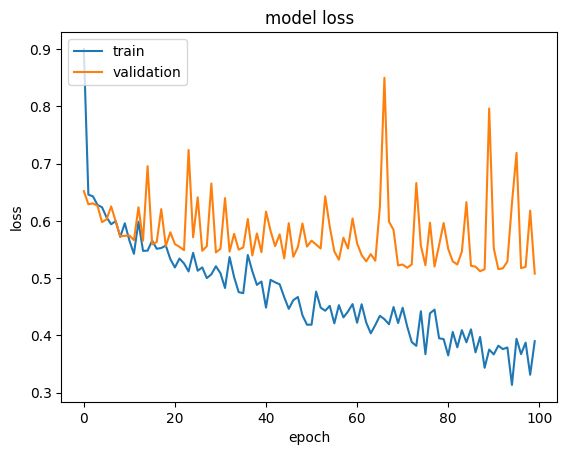

In [50]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5. Changing the optimizer

In [53]:
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [54]:
# change optimizer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [55]:
# model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.5512 - loss: 0.6820 - val_accuracy: 0.6360 - val_loss: 0.6689
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6330 - loss: 0.6607 - val_accuracy: 0.6204 - val_loss: 0.6462
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6479 - loss: 0.6369 - val_accuracy: 0.6487 - val_loss: 0.6339
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6630 - loss: 0.6259 - val_accuracy: 0.6841 - val_loss: 0.6173
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6848 - loss: 0.6081 - val_accuracy: 0.6700 - val_loss: 0.6143
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7061 - loss: 0.5960 - val_accuracy: 0.6686 - val_loss: 0.6120
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7084 - loss: 0.5960 - val_accuracy: 0.6714 - val_loss: 0.6088
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.7032 - loss: 0.5914 - val_accuracy:

In [58]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [59]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7223796033994334 %


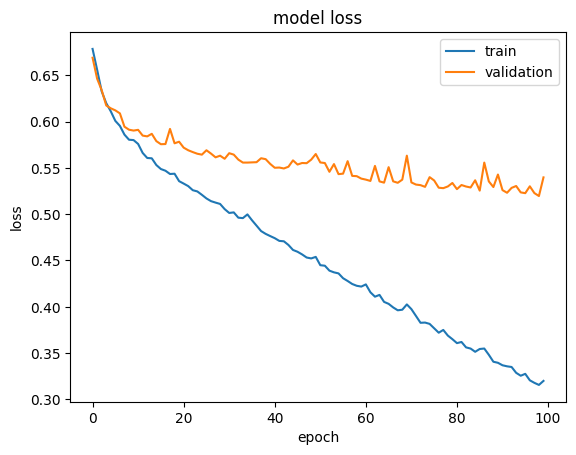

In [60]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

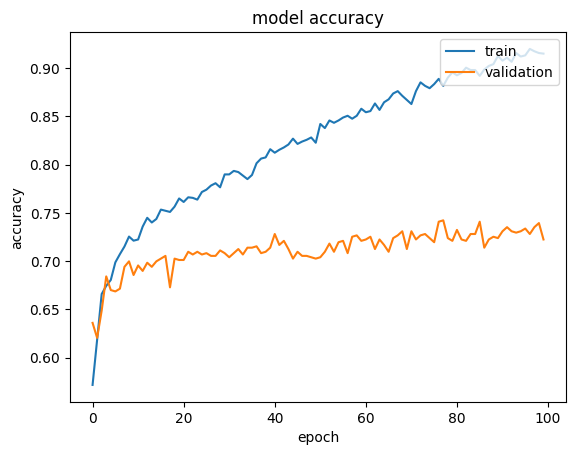

In [61]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()